In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = (r"C:\Users\melat\python-api-challenge\output_data\cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
# List of city data
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 550 == 0 and i >= 551):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | chernyshevskiy
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | effium
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | znamenskoye
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 11 of Set 1 | baghdad
Processing Record 12 of Set 1 | englehart
Processing Record 13 of Set 1 | fortuna
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | vardo
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | harseni
Processing Record 19 of Set 1 | corinto
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 22 of Set 

Processing Record 182 of Set 1 | naze
Processing Record 183 of Set 1 | aksarka
Processing Record 184 of Set 1 | newcastle
Processing Record 185 of Set 1 | daniel flores
Processing Record 186 of Set 1 | severo-kurilsk
Processing Record 187 of Set 1 | cuamba
Processing Record 188 of Set 1 | goderich
Processing Record 189 of Set 1 | amderma
City not found. Skipping...
Processing Record 190 of Set 1 | wawa
Processing Record 191 of Set 1 | mehamn
Processing Record 192 of Set 1 | gorontalo
Processing Record 193 of Set 1 | biltine
Processing Record 194 of Set 1 | rio grande
Processing Record 195 of Set 1 | bondo
Processing Record 196 of Set 1 | patiya
Processing Record 197 of Set 1 | vostok
Processing Record 198 of Set 1 | chor
Processing Record 199 of Set 1 | muisne
Processing Record 200 of Set 1 | bethel
Processing Record 201 of Set 1 | vestbygda
City not found. Skipping...
Processing Record 202 of Set 1 | hirara
Processing Record 203 of Set 1 | rupert
Processing Record 204 of Set 1 | boa v

Processing Record 365 of Set 1 | jalu
Processing Record 366 of Set 1 | cayenne
Processing Record 367 of Set 1 | taoudenni
Processing Record 368 of Set 1 | middelburg
Processing Record 369 of Set 1 | souillac
Processing Record 370 of Set 1 | vanimo
Processing Record 371 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 372 of Set 1 | sorong
Processing Record 373 of Set 1 | shimoda
Processing Record 374 of Set 1 | nizhniy kuranakh
Processing Record 375 of Set 1 | richards bay
Processing Record 376 of Set 1 | castelldefels
Processing Record 377 of Set 1 | tikhmenevo
City not found. Skipping...
Processing Record 378 of Set 1 | el retorno
Processing Record 379 of Set 1 | acari
Processing Record 380 of Set 1 | aripuana
Processing Record 381 of Set 1 | cervo
Processing Record 382 of Set 1 | sorland
Processing Record 383 of Set 1 | caravelas
Processing Record 384 of Set 1 | carmen del parana
Processing Record 385 of Set 1 | concarneau
Processing Record 386 of Set 1 | perigueu

Processing Record 549 of Set 1 | agboville
Processing Record 550 of Set 1 | shchelyayur
City not found. Skipping...
Processing Record 551 of Set 1 | matara
Processing Record 552 of Set 1 | yangjiang
Processing Record 553 of Set 1 | wapi pathum
Processing Record 554 of Set 1 | steamboat springs
Processing Record 555 of Set 1 | tarata
Processing Record 556 of Set 1 | san jeronimo
Processing Record 557 of Set 1 | pervomayskoye
Processing Record 558 of Set 1 | grand baie
Processing Record 559 of Set 1 | belaya gora
Processing Record 560 of Set 1 | valley station
Processing Record 561 of Set 1 | north bend
Processing Record 562 of Set 1 | nazarovo
Processing Record 563 of Set 1 | nacala
Processing Record 564 of Set 1 | hobyo
Processing Record 565 of Set 1 | hervey bay
Processing Record 566 of Set 1 | lishu
Processing Record 567 of Set 1 | vitim
Processing Record 568 of Set 1 | krasnoye-na-volge
Processing Record 569 of Set 1 | dombarovskiy
Processing Record 570 of Set 1 | thabazimbi
Process

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)
# Extract relevant fields from the data frame
city = city_data_pd["City"]
country = city_data_pd["Country"]
date = city_data_pd["Date"]
lat = city_data_pd["Lat"]
lng = city_data_pd["Lng"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]
# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")
# Show Record Count
city_data_pd.count()

City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

In [5]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,avarua,68,CK,1568656406,78,-21.21,-159.78,73.40,6.93
1,chernyshevskiy,20,RU,1568656406,83,63.01,112.47,24.43,2.75
2,jamestown,0,AU,1568656406,72,-33.21,138.60,37.93,12.17
3,hobart,14,AU,1568656406,69,-42.88,147.33,41.00,9.17
4,effium,95,NG,1568656407,85,6.63,8.06,79.15,1.81


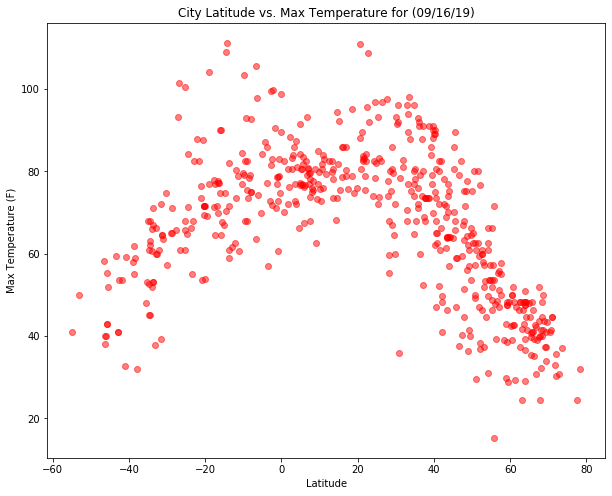

In [6]:
#create sactter plot for Latitude vs. Temperature 

plt.figure(figsize=(10,8))
plt.scatter(city_data_pd["Lat"], city_data_pd["Max Temp"], color='r', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature for (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("LatitudevsTemperature.png")

# Show the plot
plt.show()


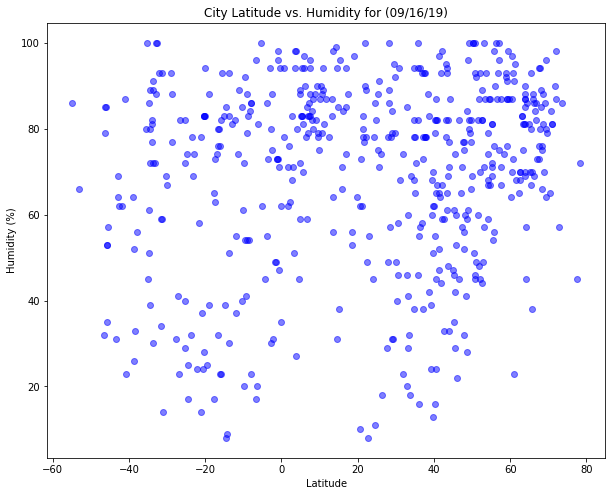

In [7]:
#create sactter plot for Latitude vs. Humidity Plot
plt.figure(figsize=(10,8))
plt.scatter(city_data_pd["Lat"], city_data_pd["Humidity"], color='b', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity for (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("LatitudevsHumidity.png")

# Show the plot
plt.show()

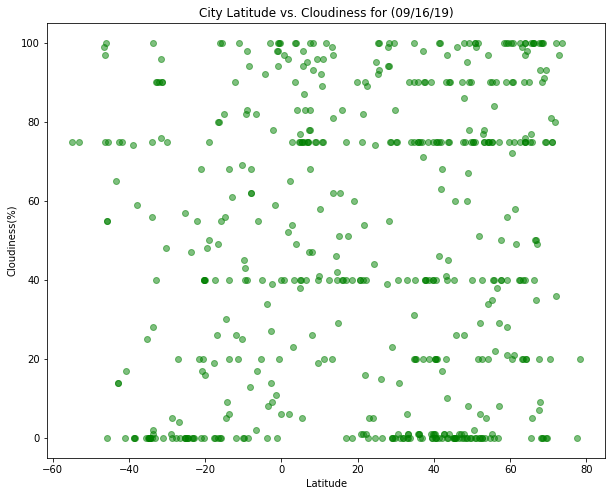

In [8]:
#create sactter plot for Latitude vs. Cloudiness Plot
plt.figure(figsize=(10,8))
plt.scatter(city_data_pd["Lat"], city_data_pd["Cloudiness"], color='g', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title("City Latitude vs. Cloudiness for (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("LatitudevsCloudiness.png")

# Show the plot
plt.show()

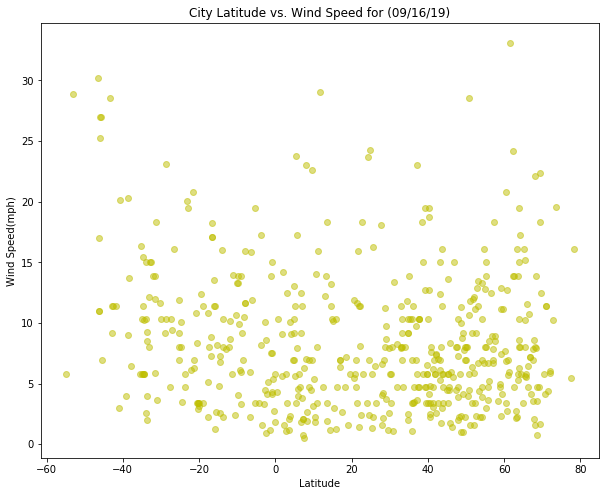

In [9]:
#create sactter plot for Latitude vs. Wind Speed  Plot
plt.figure(figsize=(10,8))
plt.scatter(city_data_pd["Lat"], city_data_pd["Wind Speed"], color='y', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title("City Latitude vs. Wind Speed for (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("LatitudevsWindSpeed.png")

# Show the plot
plt.show()